In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [5]:
df.isnull().sum().sum()

425

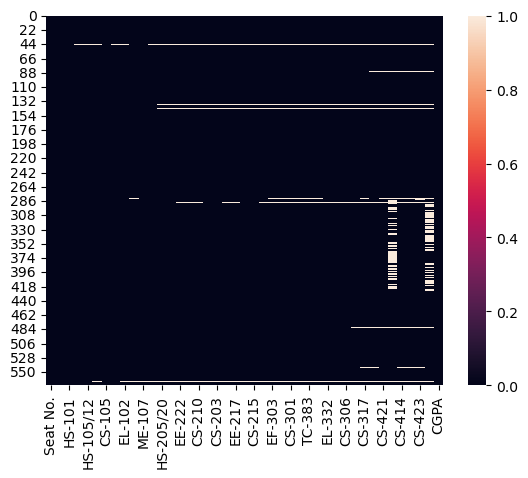

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.replace(np.nan,0, inplace = True)

In [8]:
df.isnull().sum().sum()

0

In [16]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [19]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [33]:
df.drop('Seat No.',axis=1,inplace=True)

In [34]:
df.replace(grades_enc, inplace=True)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


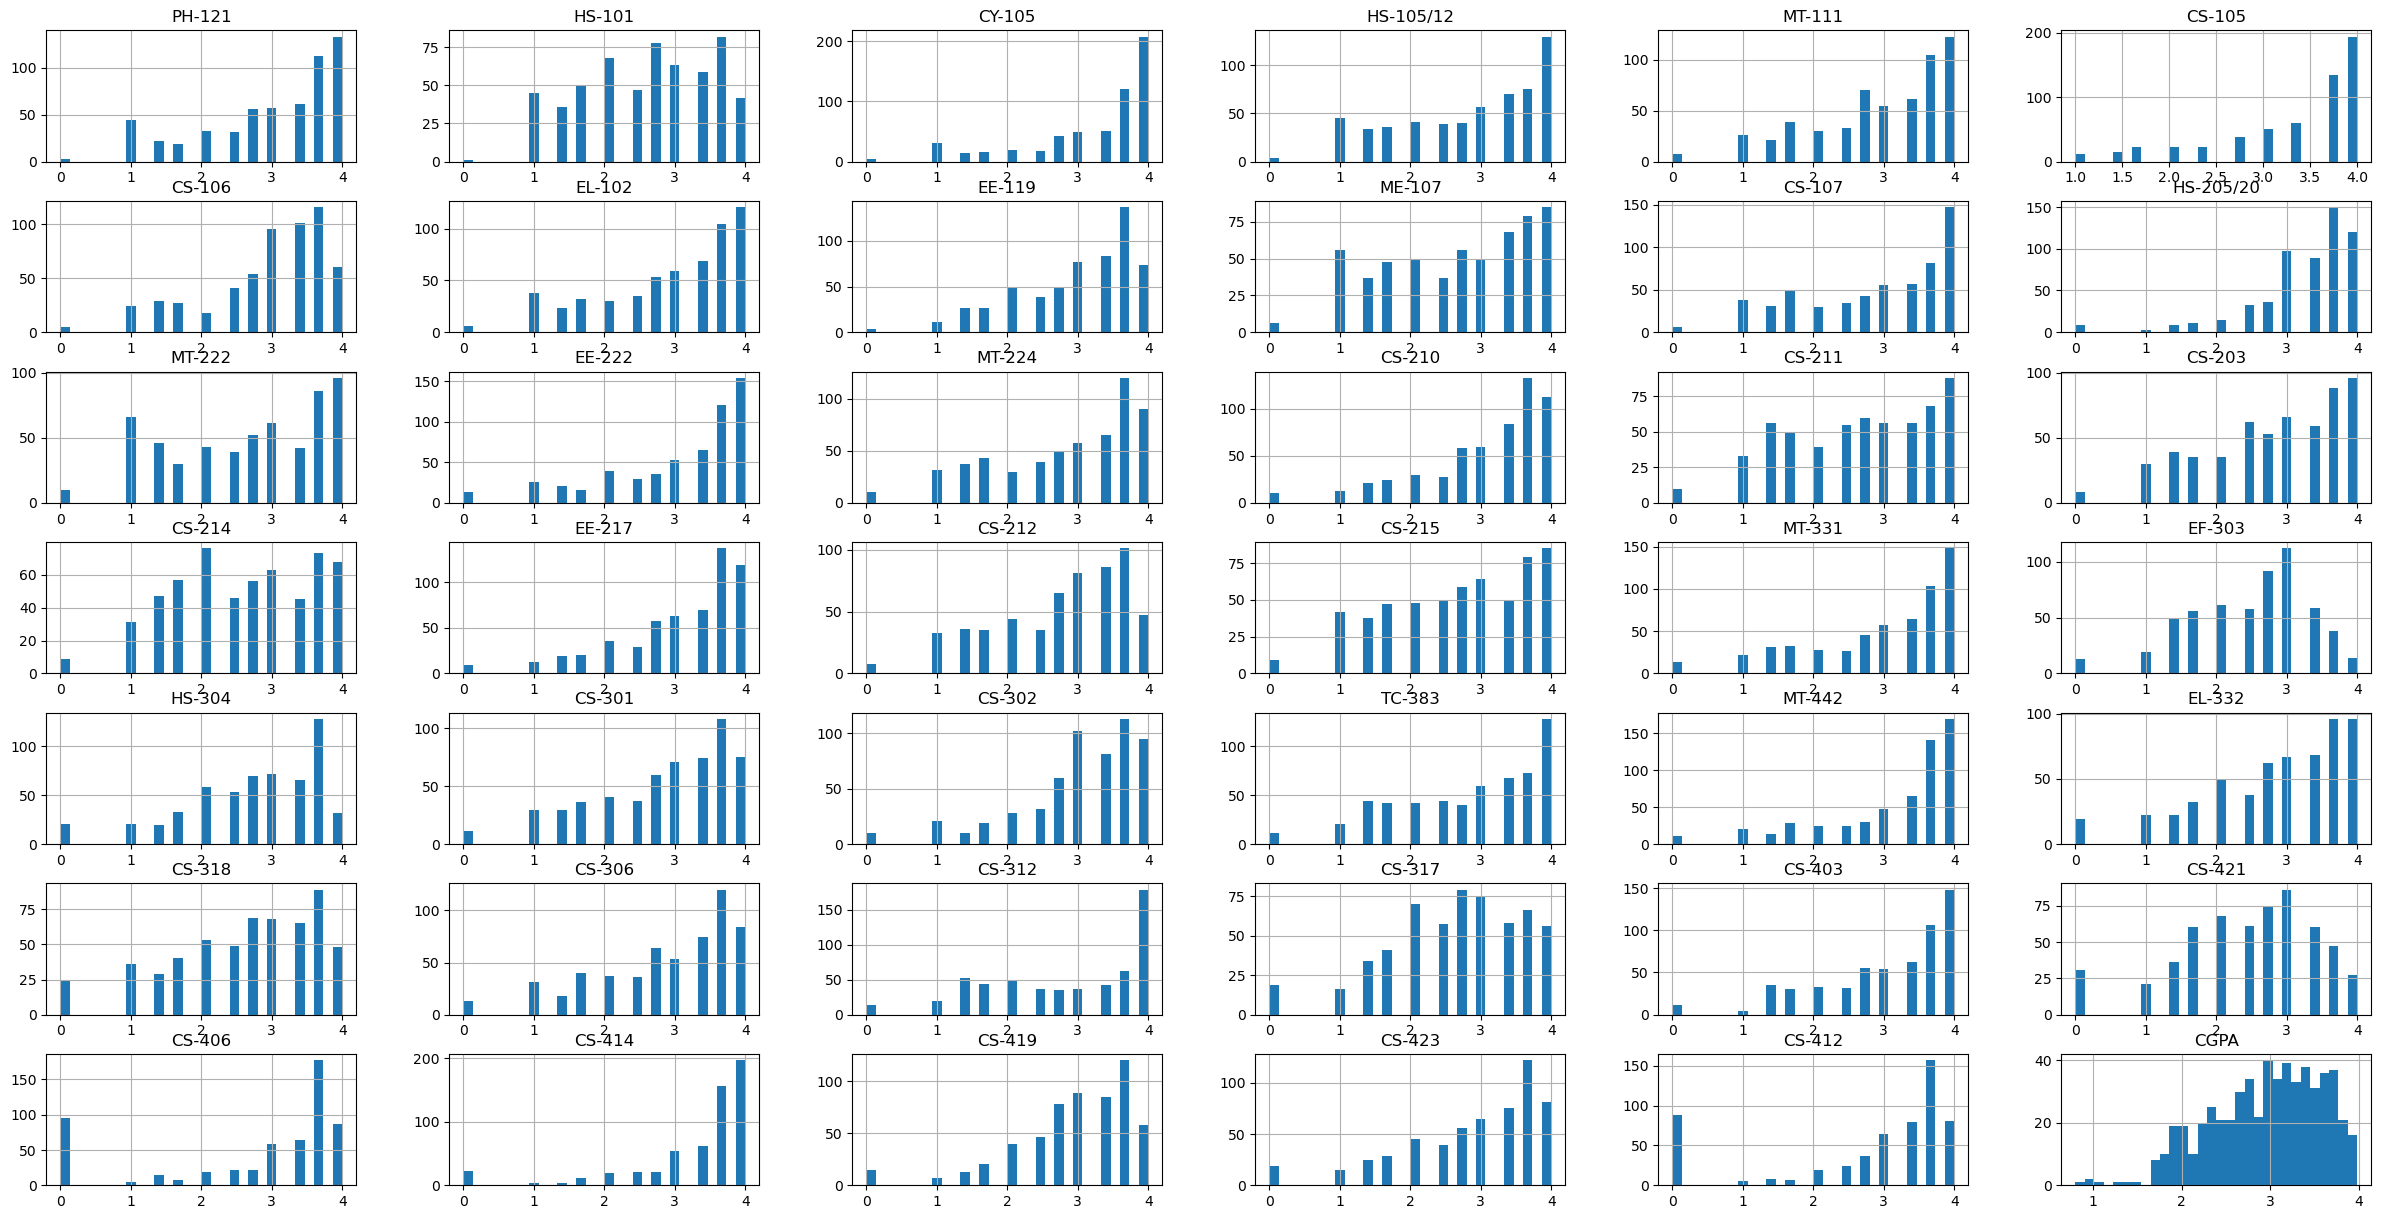

In [35]:
df.hist(bins=30,figsize=(30,15))
plt.show()

<Axes: >

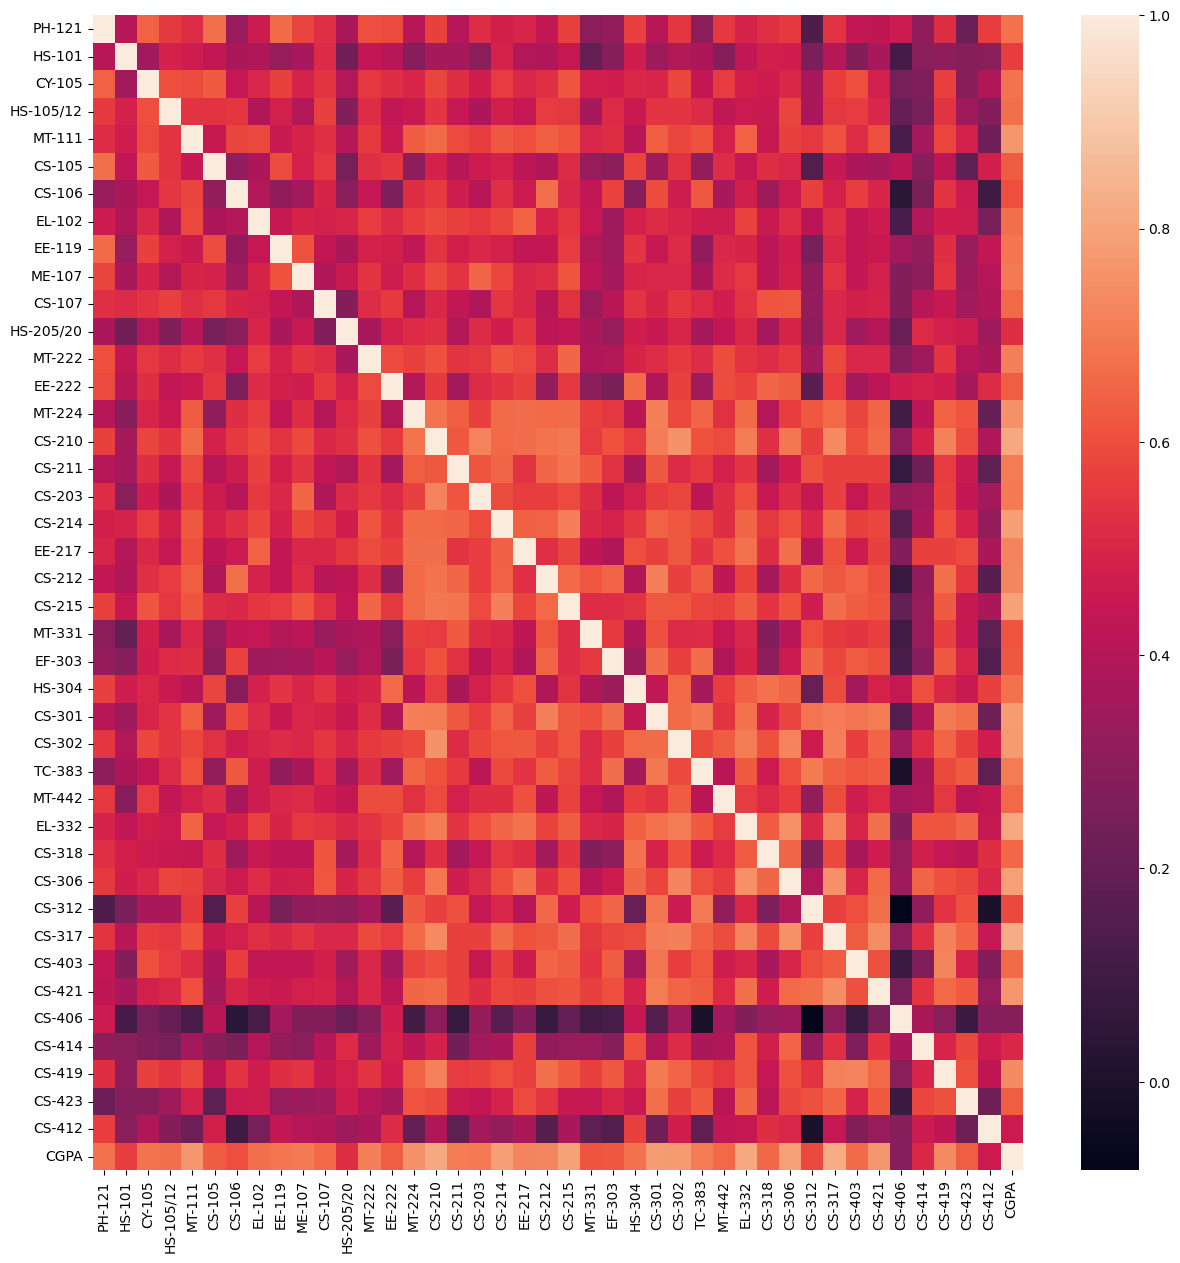

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [37]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.892294,2.651138,3.068827,2.450963,2.772154,3.349737,2.963573,2.906305,2.794221,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,1.095450,0.952455,0.955983,0.973947,1.393964,0.918549,0.861763,0.987516,1.338912,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.400000,1.700000,2.400000,3.000000,2.700000,2.400000,2.400000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,2.700000,3.400000,2.700000,3.400000,3.700000,3.000000,3.000000,3.400000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [38]:
x=df.iloc[:,:-1]
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [39]:
y=df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [40]:
x.shape

(571, 41)

In [41]:
y.shape

(571,)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
lm= LinearRegression()
lm

LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
lm.score(x_train,y_train)

0.9547163455567195

In [47]:
lm.coef_

array([ 0.02393071,  0.04982626, -0.01336673,  0.01765447,  0.06750682,
        0.03995907, -0.00344118,  0.0213786 ,  0.11263288,  0.04555412,
        0.01558404, -0.03015394,  0.02273794, -0.00252263,  0.0524712 ,
        0.03103928, -0.00244268,  0.01662439,  0.02298253, -0.007442  ,
       -0.00622397,  0.02116287,  0.01622564,  0.01585037,  0.01948487,
        0.04882759,  0.01094158,  0.01290112, -0.01105821,  0.04739157,
        0.01208343,  0.09119616, -0.01142958,  0.05410747, -0.00848435,
        0.06003306, -0.02001003, -0.03958773,  0.00202915,  0.01234612,
       -0.00922649])

In [49]:
lm.intercept_

0.7266653725272412

In [50]:
pred= lm.predict(x_test)

In [51]:
print('Predicted Result Price:',pred)
print('Actual Price:',y_test)

Predicted Result Price: [2.02960625 3.4245546  2.82360945 2.25657942 3.81694401 3.51347776
 2.66454992 2.35392144 2.18984875 3.18617677 3.41136991 2.91742852
 3.73594635 2.71326307 3.93292854 2.58612989 2.17036494 3.55684463
 2.35454595 2.53422571 2.47505572 3.87063781 2.67701987 2.73135353
 2.87059578 3.35106461 3.34536831 2.8304113  3.35994338 3.31772602
 2.64424728 2.83723093 3.49536125 3.36853814 3.73170955 3.03291727
 2.76875941 3.7950618  2.82186194 1.99831193 3.64811943 3.46701329
 3.74543032 3.62609054 3.20329046 2.43679224 2.68725582 3.16547683
 3.22146758 3.74422938 3.25816949 3.37143253 3.10134612 3.51886176
 3.37562221 3.02310903 3.75697549 3.73140337 3.69000803 2.78968666
 3.52659854 3.44092173 3.76721888 3.50175748 3.23170358 3.14683759
 3.41891033 3.33076916 2.93137913 2.32735278 3.68217478 3.15683265
 2.66022189 3.78280883 3.89683644 3.41752944 3.27972606 2.3170425
 3.76373794 2.946184   2.5181269  2.9986016  1.41482685 2.61561153
 3.74156435 3.76268328 3.33042989 2.930

In [56]:
print('error:')
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
MAE: 0.08959792454077521
MSE: 0.01903482787979773
Root Mean Squared Error: 0.13796676367806027


In [58]:
from sklearn.metrics import r2_score

In [59]:
print(r2_score(y_test,pred))

0.9428018622794286


In [70]:
input_grades = ['B-', 'A', 'C+', 'A-', 'B+', 'B', 'C', 'C-', 'D+', 'WU', 'A+', 'F', 'W', 'I','A', 'B+', 'B', 'C+', 'C', 'A-', 'B', 'C-', 'D+', 'B-', 'A', 'C+', 'A-', 'B+','B', 'C', 'C-', 'D+', 'WU', 'A+', 'F', 'W', 'I', 'A', 'B+','B','A']

In [71]:
input_cgpa = [grades_enc[grade] for grade in input_grades]
input_cgpa_2d = np.array(input_cgpa).reshape(1, -1)
predicted_cgpa = lm.predict(input_cgpa_2d)

In [73]:
print("Predicted CGPA value:", predicted_cgpa)

Predicted CGPA value: [2.62635281]
